<a href="https://colab.research.google.com/github/TrishKedi/dogs_vs_cats_cnn_keras/blob/main/augmentation_dogs_vs_cats_cnn_keras0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = '/content'


In [3]:
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:10<00:00, 160MB/s]
100% 812M/812M [00:10<00:00, 79.4MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

with zipfile.ZipFile('data/train.zip', 'r') as zip_ref:
    zip_ref.extractall('data/train')

In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = 'data/train/train'
train_dir = 'data/train_split'
val_dir = 'data/val_split'

os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(val_dir, 'dogs'), exist_ok=True)

filenames = os.listdir(base_dir)
train_files, val_files = train_test_split(filenames, test_size=0.2, random_state=42)

for file in train_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'dogs', file))
    elif 'cat' in file:
          shutil.move(os.path.join(base_dir, file), os.path.join(train_dir, 'cats', file))

for file in val_files:
    if 'dog' in file:
        shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'dogs', file))
    elif 'cat' in file:
          shutil.move(os.path.join(base_dir, file), os.path.join(val_dir, 'cats', file))


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Random rotation in degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Fill pixels after transformations
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Random rotation in degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shearing transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flipping
    fill_mode='nearest'  # Fill pixels after transformations
    )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

val_generator = train_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,  activation='relu'),
    layers.Dense(1,  activation='sigmoid'),

])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']

)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator

)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 267ms/step - accuracy: 0.5374 - loss: 0.7098 - val_accuracy: 0.6622 - val_loss: 0.6144
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 264ms/step - accuracy: 0.6486 - loss: 0.6278 - val_accuracy: 0.6774 - val_loss: 0.5960
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 263ms/step - accuracy: 0.7032 - loss: 0.5619 - val_accuracy: 0.7354 - val_loss: 0.5437
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 261ms/step - accuracy: 0.7293 - loss: 0.5373 - val_accuracy: 0.7158 - val_loss: 0.5506
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 257ms/step - accuracy: 0.7521 - loss: 0.5045 - val_accuracy: 0.7284 - val_loss: 0.5355
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 258ms/step - accuracy: 0.7599 - loss: 0.4913 - val_accuracy: 0.7602 - val_loss: 0.4812
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 258ms/step - accuracy: 0.7731 - loss: 0.4707 - val_accuracy: 0.7834 - val_loss: 0.4611
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 275ms/step - accuracy: 0.7877 - loss: 0.45

157/157 ━━━━━━━━━━━━━━━━━━━━ 35s 225ms/step - accuracy: 0.7914 - loss: 0.4388
Validation Accuracy: 0.80


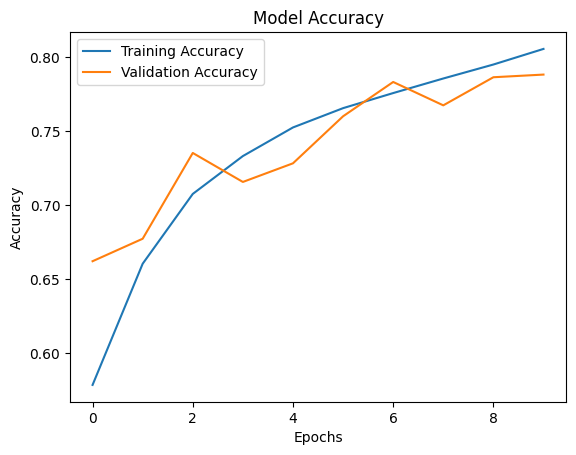

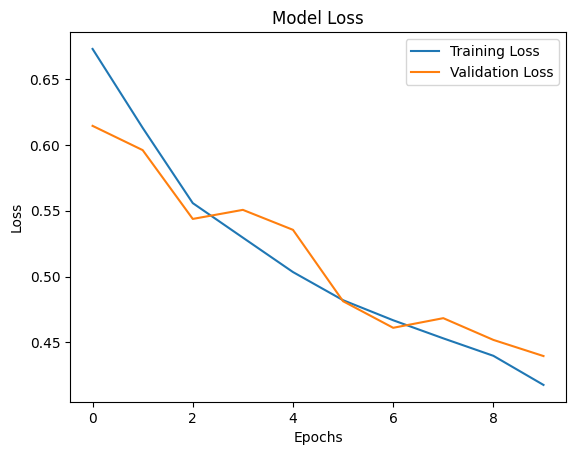

In [10]:
import matplotlib.pyplot as plt

#print accuracy
loss, accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {accuracy:.2f}')

#plot loss and accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#save model
model.save('dogs_vs_cats_cnn.keras')